# Introduction  😃😃

- Insurance Forecast by using Linear Regression 😃😃

### Content the DataSet ❤️

### Columns 👍
- Age: age of primary beneficiary 🤝
- Sex: insurance contractor gender, female, male 🤝
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9 🤝
- Children: Number of children covered by health insurance / Number of dependents 🤝
- Smoker: Smoking 🤝
- Region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest. 🤝
- Charges: Individual medical costs billed by health insurance  🤝🤝🤝


## Mission  🙄🙄

- Can you accurately predict insurance costs? 🙄🙄🙄


# Work plan ❤️ 

- Analyze and explore data 🤝
- Building a Machine Learning Model 🤝



# 1- Analyze and Explore DataSet 😃

In [7]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objects as go
import plotly.express as px

In [8]:
#Importing the dataset
df=pd.read_csv(r"C:\Users\kingr\Downloads\insurance.csv")


# look the data set
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
# looking the shape DataSet
df.shape

(1338, 7)

In [10]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#checking null value 
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- No any missing value 

In [13]:
# look  describe data set
df.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


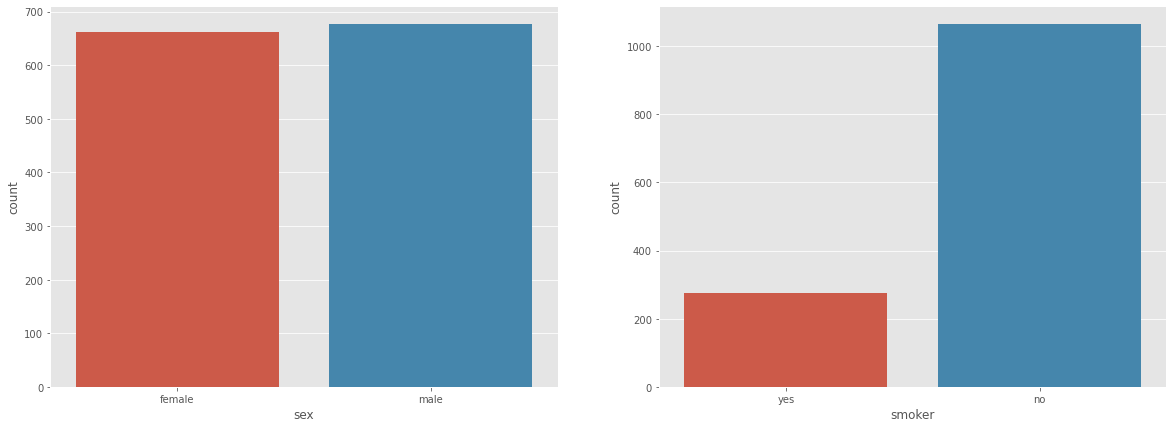

In [28]:
# how much repeat the gender and smoker in the dataset


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.countplot(x='sex',data=df,ax=ax[0])
sns.countplot(x='smoker',data=df,ax=ax[1])

plt.show()

#### Gender
- Male      0.505232
- Female    0.494768

#### Smoker 
- No     0.795217
- yes    0.204783

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


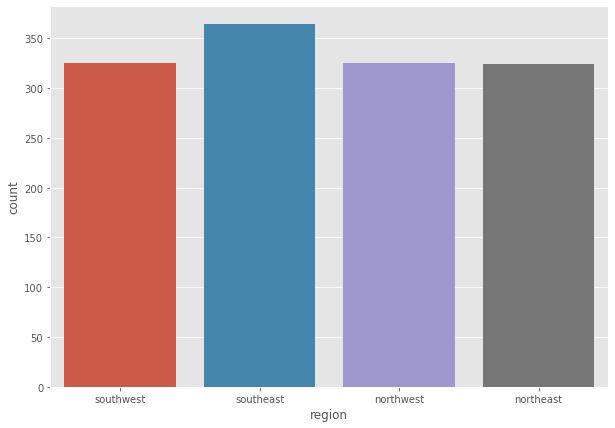

In [22]:
# how much repeat the region  in the dataset

plt.figure(figsize=(10,7))
sns.countplot(df["region"])
plt.show()

#### Region 
- southeast    0.272048
- southwest    0.242900
- northwest    0.242900
- northeast    0.242152

# Some Visualisation  😃😃

In [30]:
#interactive graph 

px.scatter(df,x="age",y="charges",color="sex",animation_frame="smoker",size="children")


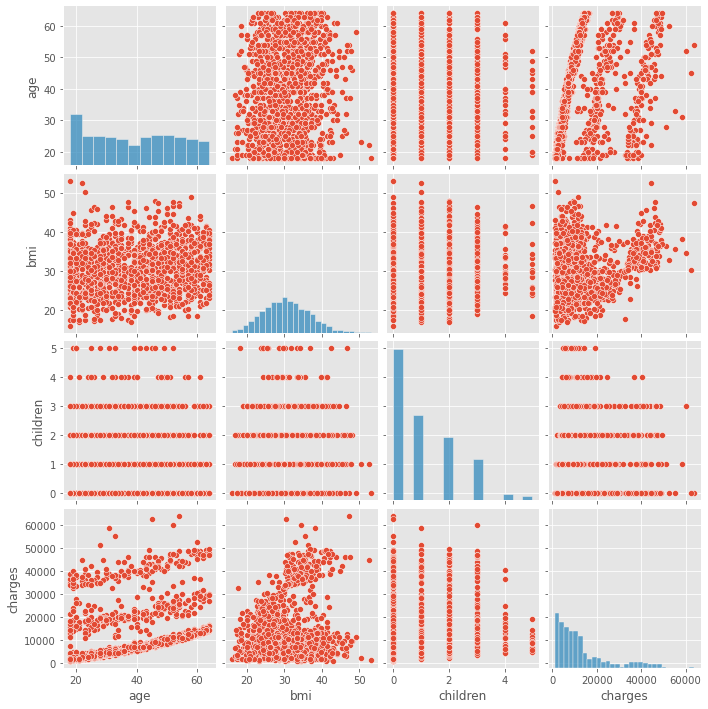

In [31]:
sns.pairplot(df)


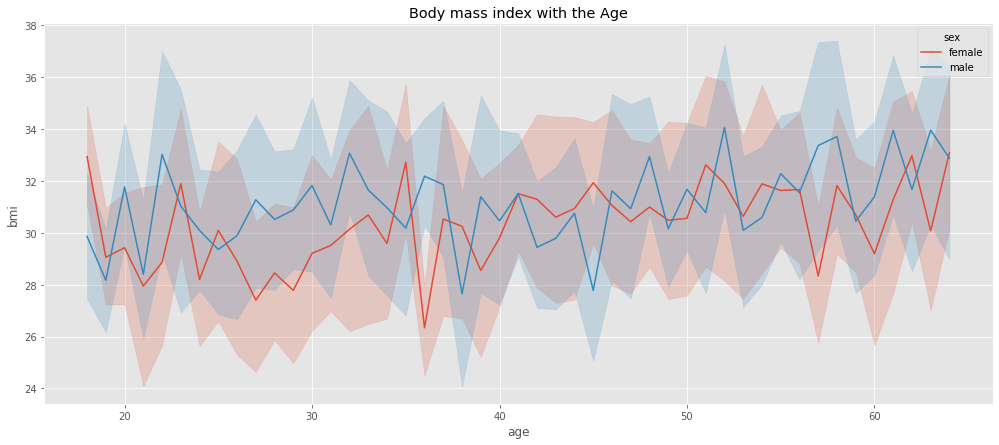

In [32]:
plt.figure(figsize=(17,7))
sns.lineplot(data=df,x="age",y="bmi",hue="sex")
plt.title("Body mass index with the Age")
plt.show()

- we see the values Body mass in the Male higher than the female

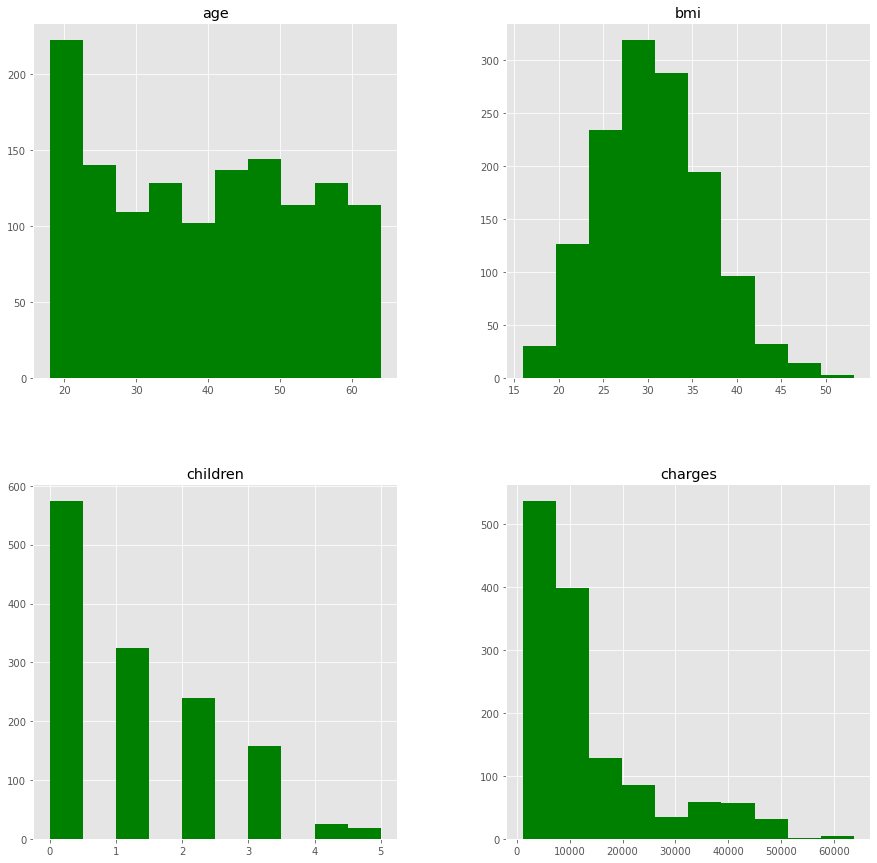

In [33]:
# Data Visualization with histogram 
df[['age',  'bmi', 'children', 'charges']].hist(bins=10, figsize=(15,15),color='green')
plt.show()

In [34]:
# group by 

reg=df.groupby("region")["charges"].mean().round(2)
reg

region
northeast    13406.38
northwest    12417.58
southeast    14735.41
southwest    12346.94
Name: charges, dtype: float64

<AxesSubplot:xlabel='region'>

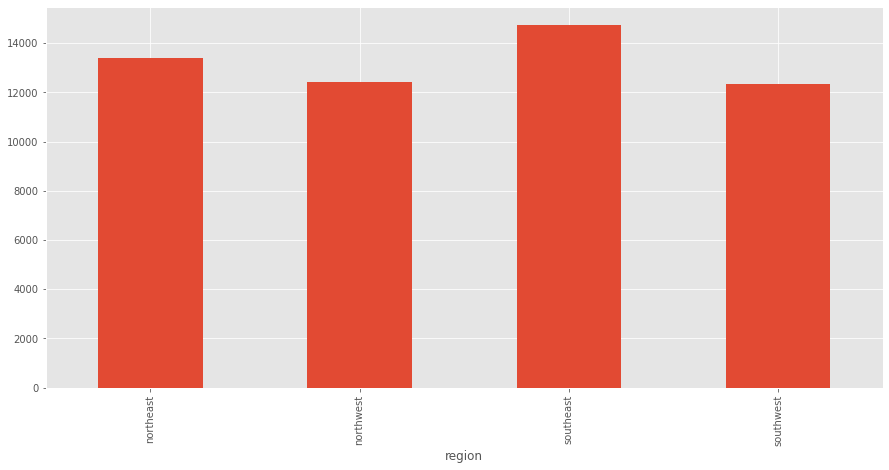

In [14]:
# Visualisation group by

reg.plot(kind="bar", figsize=(15,7))

In [35]:
# let making group by
a=df.groupby(["sex","smoker","region"])["charges"].mean().round(2)
a

sex     smoker  region   
female  no      northeast     9640.43
                northwest     8787.00
                southeast     8440.21
                southwest     8234.09
        yes     northeast    28032.05
                northwest    29670.82
                southeast    33034.82
                southwest    31687.99
male    no      northeast     8664.04
                northwest     8320.69
                southeast     7609.00
                southwest     7778.91
        yes     northeast    30926.25
                northwest    30713.18
                southeast    36029.84
                southwest    32598.86
Name: charges, dtype: float64

<AxesSubplot:xlabel='sex,smoker,region'>

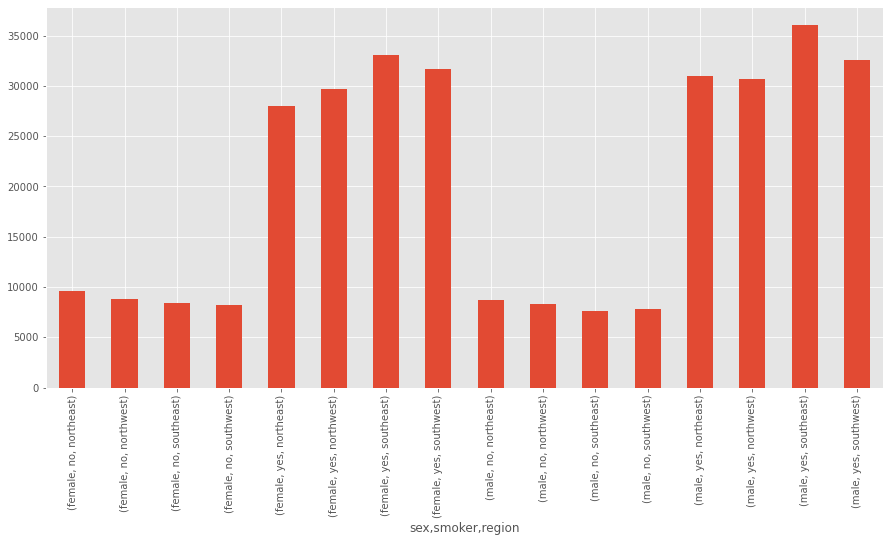

In [36]:
# Visualisation group by

a.plot(kind="bar", figsize=(15,7))

In [37]:
smo=df.groupby("smoker")["charges"].mean().round(2)
smo

smoker
no      8434.27
yes    32050.23
Name: charges, dtype: float64

<AxesSubplot:xlabel='smoker'>

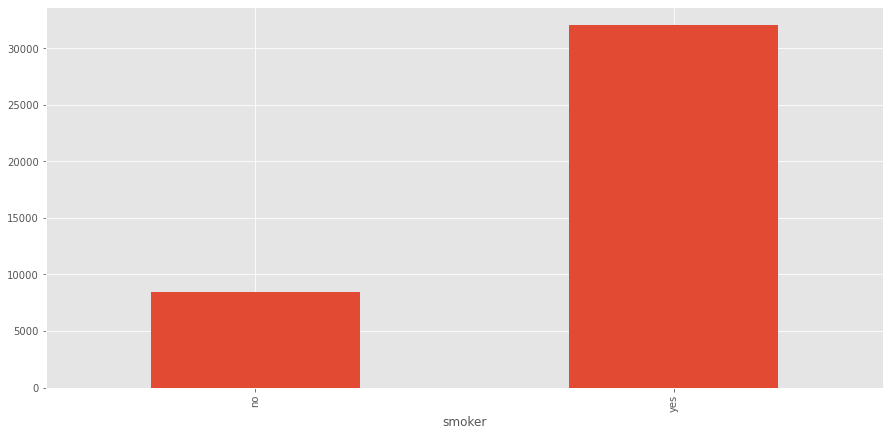

In [38]:
# Visualisation group by

smo.plot(kind="bar", figsize=(15,7))

In [39]:
gen=df.groupby("sex")["charges"].mean().round(2)
gen

sex
female    12569.58
male      13956.75
Name: charges, dtype: float64

<AxesSubplot:xlabel='sex'>

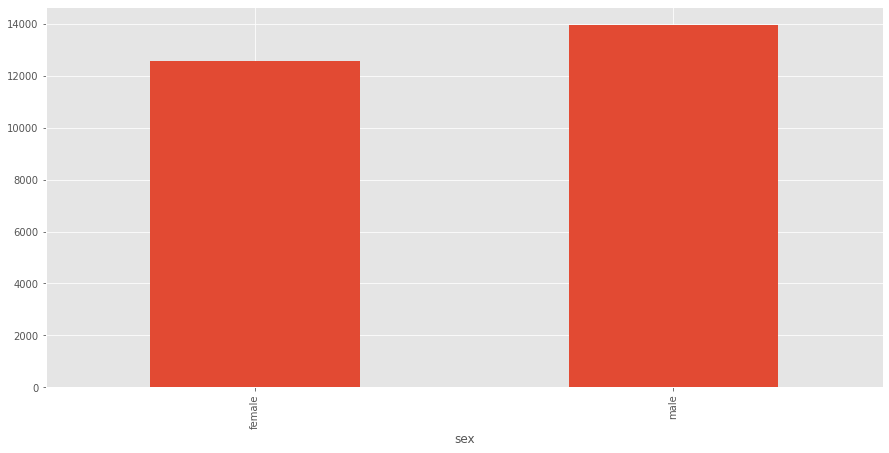

In [20]:
# Visualisation group by

gen.plot(kind="bar", figsize=(15,7))

# Analysis Results😃😃😃

We have data about an Insurance  and we want to know the highest Charges  while analyzing this data through ,  We have data about an Insurance  data  and we want to know the highest Charges  while analyzing this data through  [ Children, Smoker, Region, Charges ] 


- The higher the age, the higher the insurance value . ❤️❤️

- A non-smoker has less insurance than a smoker.❤️❤️

- The amount of insurance according to gender is similar. ❤️❤️

- The value of the insurance according to the region is also similar .❤️❤️

# 2- Building a Machine Learning Model - Regression 🙄🙄🙄

In [44]:
#Importing the basic librarires for building model


from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures,minmax_scale,MaxAbsScaler ,LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectPercentile
from sklearn.neural_network import MLPRegressor

from sklearn.svm import SVR
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [45]:

# look the data set
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
# Convert categories to numbers

df["Gender"]=pd.get_dummies(df["sex"],drop_first=True)
df["Smoker"]=pd.get_dummies(df["smoker"],drop_first=True)

In [47]:
LE=LabelEncoder()
LE.fit(df["region"])
df["Region"]=LE.transform(df["region"])

In [48]:
# drop the columns I don't need

df.drop(columns=["sex","smoker","region"],inplace=True)
df.head()

,age,bmi,children,charges,Gender,Smoker,Region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


In [49]:
#Defined X value and y value , and split the data train

X = df.drop(columns="charges")           
y = df["charges"]    # y = quality

In [50]:
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (1003, 6)
X Test  :  (335, 6)
Y Train :  (1003,)
Y Test  :  (335,)


### Linear Model

In [51]:
# using the model Linear Regression

LinearRegression_model=LinearRegression(fit_intercept=True,normalize=False,copy_X=True, n_jobs=None)

# fit model

LinearRegression_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", LinearRegression_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", LinearRegression_model.score(X_test,y_test))

# Expected value Y using X test
y_pred_LR=LinearRegression_model.predict(X_test)

# Model Evaluation
print( " Model Evaluation Linear R : mean absolute error is ", mean_absolute_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : mean squared  error is " , mean_squared_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : median absolute error is " ,median_absolute_error(y_test,y_pred_LR)) 

print(" The Score Linear Regression " ,r2_score(y_test,y_pred_LR))

Score the X-train with Y-train is :  0.7449087316606229
Score the X-test  with Y-test  is :  0.7668905583460909
 Model Evaluation Linear R : mean absolute error is  4252.8564557923655
 Model Evaluation Linear R : mean squared  error is  35174149.327053055
 Model Evaluation Linear R : median absolute error is  2709.0491358744366
 The Score Linear Regression  0.7668905583460909


- Inference : 76 % not working

### K Neighbors Regressor Model

In [29]:
# using the K Neighbors Regressor Model

KNeighborsRegressor_model=KNeighborsRegressor(n_neighbors=5,weights='uniform',algorithm='auto',leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None)

# fit model

KNeighborsRegressor_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", KNeighborsRegressor_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", KNeighborsRegressor_model.score(X_test,y_test))

# Expected value Y using X test
y_predKN=KNeighborsRegressor_model.predict(X_test)

# Model Evaluation

print(" The Score K Neighbors Regressor Model " ,r2_score(y_test,y_predKN)) 

Score the X-train with Y-train is :  0.3834675829049269
Score the X-test  with Y-test  is :  0.17140940292848195
 The Score K Neighbors Regressor Model  0.17140940292848195


- Inference : 17 % not working

### MLP Regressor Model

In [30]:
# using the MLP Regressor Model

MLPRegressor_model=MLPRegressor()

# fit model

MLPRegressor_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", MLPRegressor_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", MLPRegressor_model.score(X_test,y_test))

# Expected value Y using X test
y_predMLP=MLPRegressor_model.predict(X_test)

# Model Evaluation

print(" The Score MLP Regressor Model " ,r2_score(y_test,y_predMLP)) 

Score the X-train with Y-train is :  -0.02584977985255077
Score the X-test  with Y-test  is :  -0.01217941083301155
 The Score MLP Regressor Model  -0.01217941083301155


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



- Inference : 17 % not working

### SVR-  Regressor Model

In [31]:
# using the SVR-  Regressor Model

svr_model=SVR()

# fit model

svr_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", svr_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svr_model.score(X_test,y_test))

# Expected value Y using X test
y_predsvr=svr_model.predict(X_test)

# Model Evaluation

print(" The Score SVR  Model " ,r2_score(y_test,y_predsvr)) 

Score the X-train with Y-train is :  -0.09943877733990547
Score the X-test  with Y-test  is :  -0.09590359890482825
 The Score SVR  Model  -0.09590359890482825


- Inference : 00 % not working

### XGB Regressor Model

In [52]:
# using the XGB Regressor Model

XGB_model=XGBRegressor(n_estimators=35,max_depth=7,min_child_weight=1,subsample=1,colsample_bytree=1,
                   learning_rate=0.18)

# fit model

XGB_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", XGB_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", XGB_model.score(X_test,y_test))

# Expected value Y using X test
y_predXGB=XGB_model.predict(X_test)

# Model Evaluation

print(" The Score XGB Regressor  Model " ,r2_score(y_test,y_predXGB)) 

NameError: name 'XGBRegressor' is not defined

- Inference : 84 %  working

# Model Selection Results 😃😃😃



- Linear Regression = 76 %    ❤️❤️

- K Neighbors Regressor Model= 17 %  🙄 🙄 

- MLP Regressor Model = - 5 %  🙄 🙄 

- SVR- Regressor Model = - 9% 🙄 🙄 

- XGB Regressor Model = 84 %   😃😃 🤝🎉🤝🎉

### So , the best model XGB  Regressor Model

# Notes 😃😃😃😃

- Thank for reading my analysis and my regression. 😃😃😃😃 

- If you any questions or advice me please write in the comment . ❤️❤️❤️❤️ 
- If anyone has a model with a higher percentage, please tell me 🤝🤝🤝


# Vote ❤️😃

- If you liked my work vote me ,


# The End 🤝🎉🤝🎉